In [2]:
#!/usr/bin/env python
from __future__ import print_function

from astropy.io import ascii, fits
from importlib import reload
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from kcwitools import extract_optimal as e
from kcwitools import utils
from kcwitools import image as im

reload(e)

<module 'kcwitools.extract_optimal' from '/Users/bordoloi/WORK/python/kcwitools/kcwitools/extract_optimal.py'>

In [5]:
##Now READ In KCWI Data Cube
#filename='/Users/bordoloi/Dropbox/KCWI/LensedArc/Coadded_Data_cube.fits';
#filenamevar='/Users/bordoloi/Dropbox/KCWI/LensedArc/Coadded_Data_sigma_cube.fits';
#filenamewave='/Users/bordoloi/Dropbox/KCWI/LensedArc/arcwave.fits';


filename='/Users/bordoloi/Dropbox/KCWI/LensedArc/KCWI_0718/Data/kb180708_00063_icubes.fits';
filenamevar='/Users/bordoloi/Dropbox/KCWI/LensedArc/KCWI_0718/Data/kb180708_00063_vcubes.fits';

hdu = fits.open(filename)
hdu_hdr = hdu['PRIMARY'].header

#Flux
flux1 = hdu['PRIMARY'].data

skyy1=20
skyy2=25
skyx1=5
skyx2 =15
flux=im.cube_skysub(filename, skyy1, skyy2, skyx1, skyx2)

hdu = fits.open(filenamevar)
#variance
varcube1 = hdu['PRIMARY'].data
varcube=im.var_skysub(filenamevar, skyy1, skyy2, skyx1, skyx2)

#hdu = fits.open(filenamewave)
#variance
#wave = hdu['PRIMARY'].data

# READ In the actual header
#filename='/Users/bordoloi/Dropbox/KCWI/LensedArc/KCWI_0718/Data/kb180708_00063_icubes.fits';
#hdu = fits.open(filename)
#hdu_hdr = hdu['PRIMARY'].header
#hdu_hdr

wavegrid = utils.build_wave(hdu_hdr)

# REMEMBER X and Y and transposed in python image plotting.
# Therefore flip x and y while plotting
x1=42;
x2=44;
y1=12;
y2=24;
corners=x1,x2,y1,y2
#whitelight=np.sum(flux, axis=0)
whitelight=im.build_whitelight(hdu_hdr,flux1)


<IPython.core.display.Javascript object>


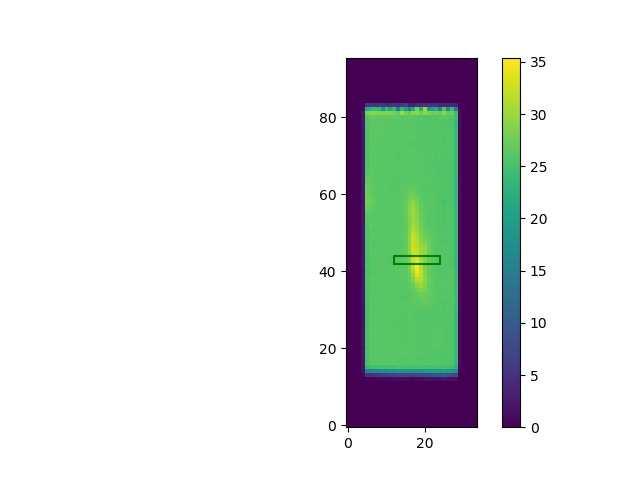

In [6]:
# Plot the data cube with the extraction region
plt.imshow(whitelight,cmap=plt.get_cmap('viridis'),origin="lower")
#plt.ylim([0,60])
#plt.xlim([0,45])
#plt.clim([0,1e-17])
plt.colorbar()

plt.plot([y1,y1,y2,y2,y1],[x1,x2,x2,x1,x1],'g')



<IPython.core.display.Javascript object>


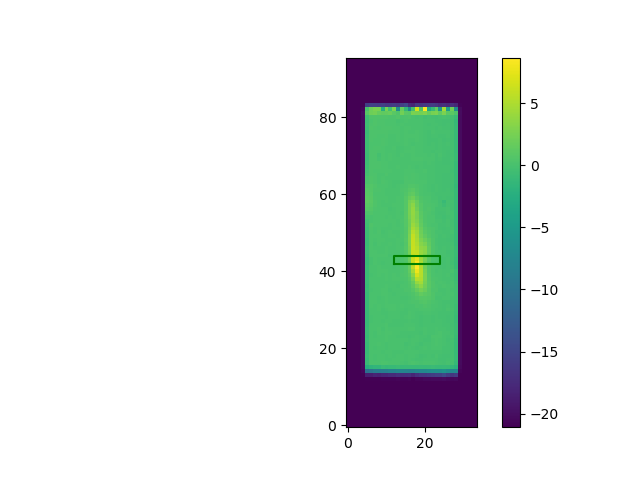

/Users/bordoloi/WORK/python/linetools/linetools/spectra/xspectrum1d.py:108: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


<IPython.core.display.Javascript object>


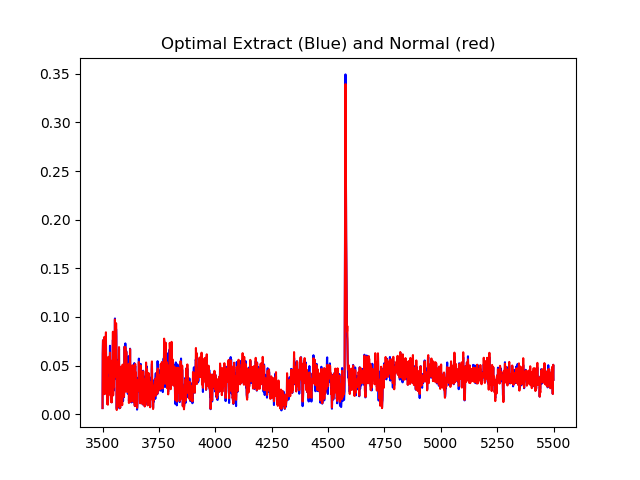

In [17]:
# Now do optimal extraction
reload(e)
xspec,xspec_std=e.extract_optimal_1D(flux, varcube,hdu_hdr,corners,plot=True)


<IPython.core.display.Javascript object>


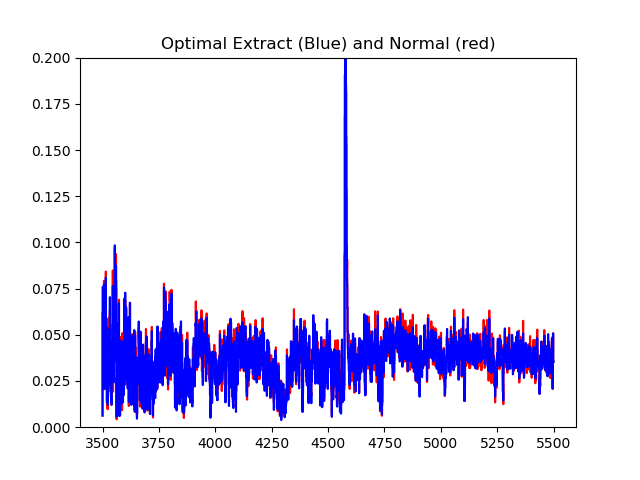

Text(0.5,1,'Optimal Extract (Blue) and Normal (red)')

In [11]:
plt.step(xspec_std.wavelength.value,xspec_std.flux.value,'r')
plt.step(xspec.wavelength.value,xspec.flux.value,'b')
plt.ylim([0,0.2])
plt.title("Optimal Extract (Blue) and Normal (red)")


In [16]:
slices = (wavegrid >=3500.) & (wavegrid <= 5500.)

sum(slices)

2000

In [ ]:
flux1=flux[slices,:,:]

In [37]:
q= flux[100,:,:] >0.00029;


In [43]:
ff=flux[100,:,:]

In [63]:
q=ff>0.0001
q

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [69]:
qt= np.where(q == True)

In [70]:
qt

(array([ 0,  0,  0, ..., 95, 95, 95]), array([ 0,  1,  2, ..., 31, 32, 33]))